In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv("./train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [5]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

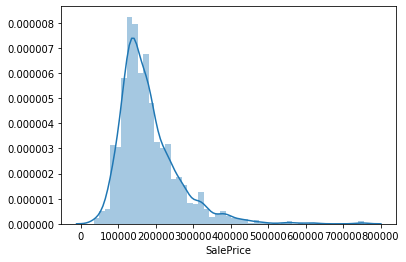

In [6]:
#histogram
sns.distplot(df_train['SalePrice']);

In [7]:
#偏度和峰度
print("Skewness:%f"% df_train['SalePrice'].skew())
print("Kurtosis:%f"% df_train['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


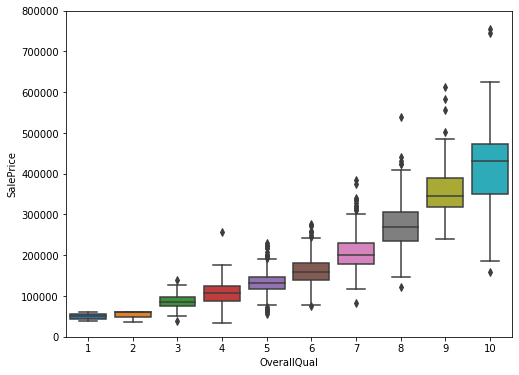

In [8]:
#箱线图
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
fx,axes = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000);

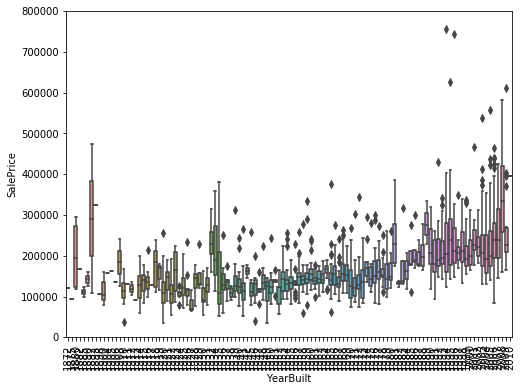

In [9]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
fx,axes = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000);
plt.xticks(rotation=90);

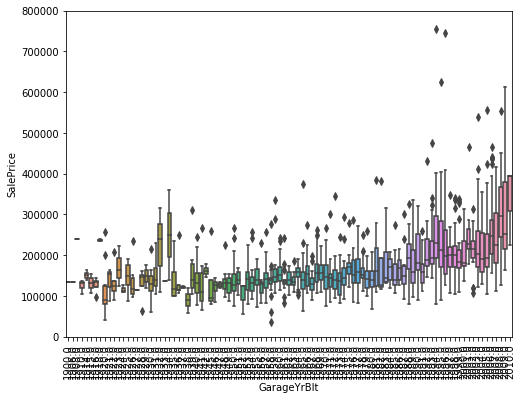

In [10]:
var = 'GarageYrBlt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
fx,axes = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000);
plt.xticks(rotation=90);

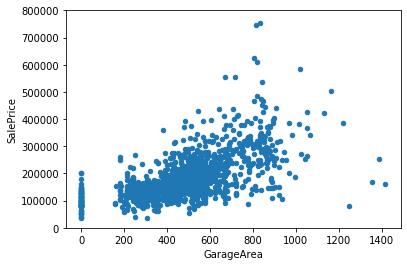

In [11]:
var = "GarageArea"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

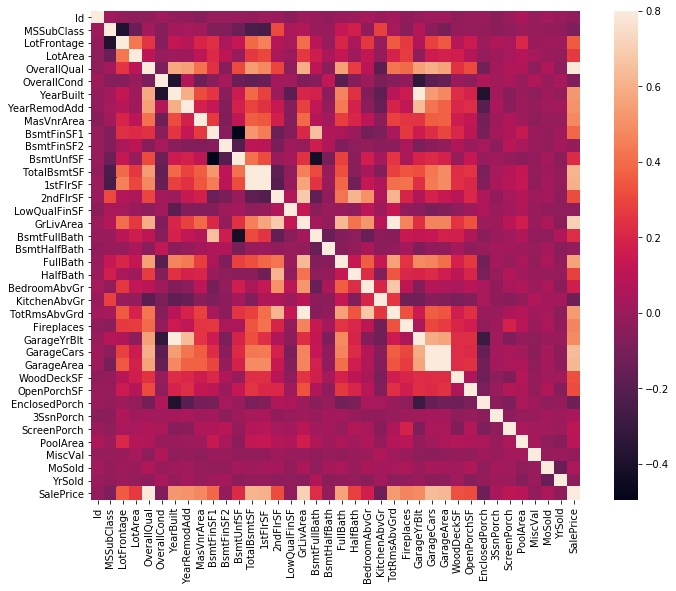

In [12]:
#相关系数矩阵
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True);

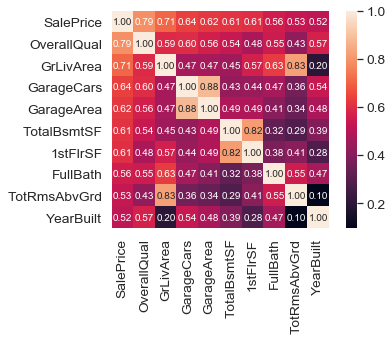

In [13]:
#售价的相关系数矩阵
k = 10 #heatmap中的变量数
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
# cm = np.corrcoef(df_train[cols].values.T)  #类似于pandas的corr(),一行代表一个变量,所以要转置
cm = df_train[cols].corr();
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':k},xticklabels=cols.values,yticklabels=cols.values)
# plt.show();

In [14]:
cols.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt'], dtype=object)

In [15]:
df_train[cols].values

array([[208500,      7,   1710, ...,      2,      8,   2003],
       [181500,      6,   1262, ...,      2,      6,   1976],
       [223500,      7,   1786, ...,      2,      6,   2001],
       ...,
       [266500,      7,   2340, ...,      2,      9,   1941],
       [142125,      5,   1078, ...,      1,      5,   1950],
       [147500,      5,   1256, ...,      1,      6,   1965]], dtype=int64)

In [16]:
df_train[cols].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


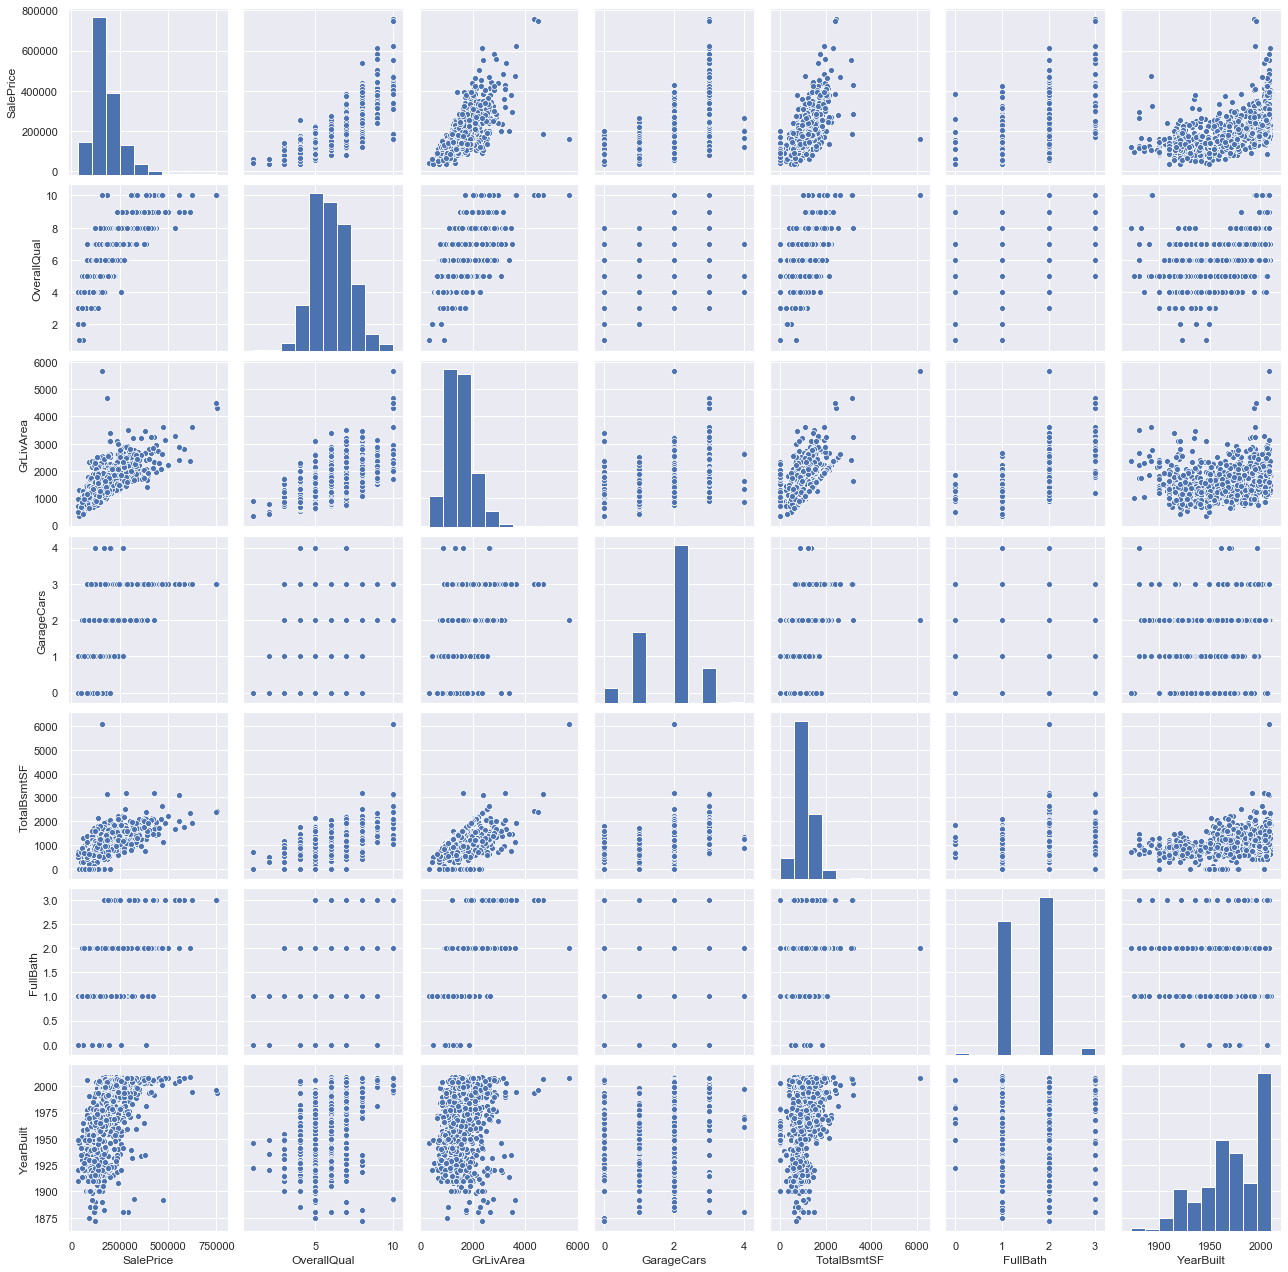

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [25]:
#丢失的数据
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [26]:
#处理缺失值
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1) #删除缺失值个数大于1的列
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) #删除某个变量具有缺失值的那几个观察值，就是行
df_train.isnull().sum().max()  #检查是否还有缺失值

0